_Behavior of the Maximum Likelihood in Quantum State Tomography_ - Supplemental Notebook
================================

Travis Scholten and Robin Blume-Kohout, _Sandia National Labs_ and the _Center for Quantum Information and Control, University of New Mexico_

The purpose of this notebook is to reproduce some of the figures from our paper, available on the [arXiv](https://arxiv.org/abs/1609.04385).

This notebook requires having Python, matplotlib, numpy, pandas, and seaborn. If you don't want to install seaborn, then that's OK - the color schemes and formatting will just look a little bit different!

If you've arrived at this notebook by cloning the [GitHub repository for this paper](https://github.com/Travis-S/2016_MaxLik_Tomography), the data files referenced are located in the `Data` directory.

Preamble
=========

Some housekeeping items.

In [1]:
from __future__ import division

import numpy as np

#For plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.cm as cm
#Make the figures render in the notebook itself
%matplotlib inline

#Special imports
import pandas as pd

try:
    import seaborn.apionly as sns

    #seaborn settings to make the plots look nice
    sns.set(style='darkgrid', font_scale=2.5)
except Exception:
    print('seaborn not installed. Falling back to matplotlib formatting and colors')
    pass

#Change "False" -> "True" to have matplotlib render
#the text in the plots with a LaTeX-like font
mpl.rc('text', usetex=False)

In [1]:
#A convenient way of storing a representation of the true states
#we considered
idDict = {'d2s0': r'\vert 0\rangle\langle 0|', 'd2s2': r'|+\rangle\langle +|',\
         'd5s0' : r'1\!\mathrm{l}_{5}/5', 'd3s2': r'.65|1\rangle\langle 1| + .35|2\rangle\langle 2|',\
         'd2s3': r'1\!\mathrm{l}_{2}/2'}

Figure 1
===========

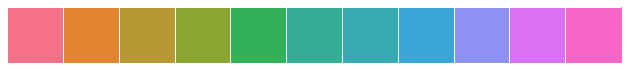

In [3]:
df = pd.read_csv('Data/iso_quantum_llrs_sim_totals.csv')
df1 = pd.read_csv('Data/iso_quantum_models.csv')
df = df.merge(df1, on=['dimRec', 'rankTrue'], how='inner')
df = df[df['dimRec'] <= 30]
ranks = df['rankTrue'].unique()

try:
    colors = sns.color_palette('husl', n_colors=len(ranks) + 1)
    sns.palplot(colors)
except Exception:
    colors = cm.viridis(np.linspace(0, 1, len(ranks) + 1))

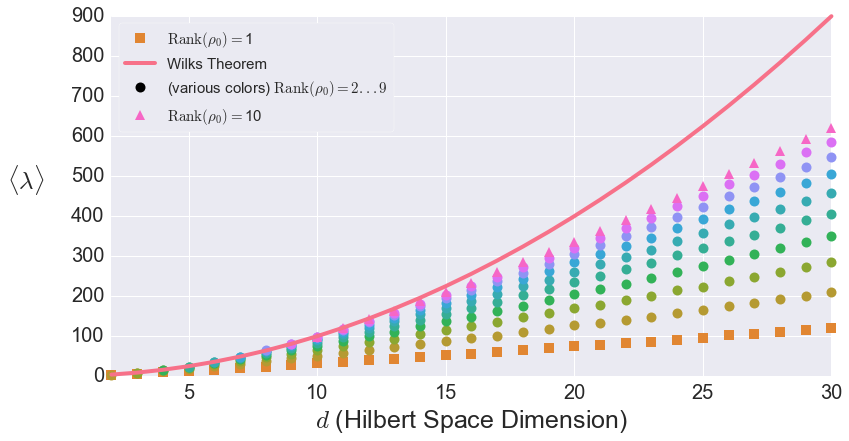

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
counter  = 1

for r in ranks:
    X = df[df['rankTrue'] == r]['dimRec'].values
    Y = df[df['rankTrue'] == r]['llrs'].values
    if r in [min(ranks), max(ranks)]:
        label = r'$\mathrm{Rank}(\rho_{0})=$'+ '{0}'.format(r)
    else:
        label = ''
    
    if r == 1:
        marker = 's'
    elif r == 10:
        marker = '^'
    else:
        marker = 'o'
        
    ax.plot(X, Y, clip_on=False, ls='', color=colors[counter],\
            marker=marker, markersize=10, label=label , alpha=1)
    counter += 1
    
X = df[df['rankTrue'] == 1]['dimRec'].values
Y = df[df['rankTrue'] == 1]['Wilks_Theorem'].values

ax.plot(X, Y, ls='-', marker='', lw=4, clip_on=False,\
        color=colors[0], label='Wilks Theorem')

temp = ax.plot([], [], ls='', color='black', marker='o',
                          markersize=10, label=r'(various colors) $\mathrm{Rank}(\rho_{0}) = 2...9$')

handles, labels = ax.get_legend_handles_labels()
ix = [0, 2, 3, 1]
handles = list(np.array(handles)[ix])
labels = list(np.array(labels)[ix])

ax.legend(loc=0, fontsize=15, frameon=True, fancybox=True, handles=handles, labels=labels)

ax.set_xlabel(r'$d$ (Hilbert Space Dimension)', fontsize=25)
ax.set_ylabel(r'$\langle \lambda\rangle$', fontsize=25, rotation=0, labelpad=45)
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=20)
ax.set_xlim([2, 30])
plt.show()

Figure 2
============

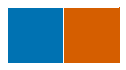

In [5]:
try:
    colors= sns.color_palette('colorblind', n_colors=3)
    colors = [colors[0], colors[2]]
    sns.palplot(colors)
except Exception:
    colors = cm.coolwarm(np.linspace(0, 1, 2))

In [6]:
def draw_kite(ax, label=False, fontsize=80):
    params = [[(2, 0), 6, 5.95], [(0, 7), 1, 1], [(1, 6), 1, 1]]
    
    for p in params:
        ax.add_patch(
        patches.Rectangle(p[0], p[1], p[2],
        fill=False,
        edgecolor=colors[1],
        linewidth=10,
        clip_on=False
        )
        )

    if label:
        ax.text(4, 4, '``Kite"', fontsize=fontsize, fontdict={'color': 'white'},\
            bbox=dict({'facecolor': colors[1], 'alpha':1}))
        
        
def draw_L(fig, label=False, fontsize=80):
    #Upper Right L
    coordsU = [[(2.1, 8), (6.025, 6.025)], [(8, 8), (6.03, 8)], [(1.07, 8), (8, 8)],\
         [(1.07, 2.08), (7.09, 7.09)], [(1.07, 1.07), (7.09, 8)],\
           [(2.08, 2.08), (6.03, 7.09)]]

    #Lower Left L
    coordsL = [[(0, 0), (0, 6.9)], [(1.93, 1.93), (0, 5.93)], [(0, 1.93), (0, 0)],\
           [(0, .94), (6.92, 6.92)],\
             [(.95, 1.89), (5.93, 5.93)], [(.94, .94), (5.93, 6.92)]]
    
    coordsU.extend(coordsL)
    for c in coordsU:
        line = plt.Line2D(c[0], c[1], lw=10, color=colors[0], clip_on=False)
        fig.gca().add_line(line)
    
    if label:
        ax.text(.5, 4, '``L"', fontsize=fontsize, fontdict={'color': 'white'},\
            bbox=dict({'facecolor': colors[0], 'alpha':1}))
        
        ax.text(4.5, 6.75, '``L"', fontsize=fontsize, fontdict={'color': 'white'},\
            bbox=dict({'facecolor': colors[0], 'alpha':1})) 

In [7]:
#Creates the state
df = pd.read_csv('Data/states.csv')
M = df[df['stateID'] == 'd2s3'].values[0][1:]
M = [np.abs(np.complex(x)) for x in M]
M = np.matrix(M).reshape((5, 5))
N = np.zeros_like(np.eye(8))
for j in xrange(len(M)):
    for k in xrange(len(M)):
        N[j, k] = M[j,k]

In [8]:
df = pd.read_csv('Data/iso_quantum_llrs_sim_contribs.csv')
M = np.matrix(df[df['stateID'] == 'd2s3'].values[0][2:], dtype=float)
M = M.reshape((8, 8))

In [9]:
df.head()

,stateID,numTrials,"0,0","0,1","0,2","0,3","0,4","0,5","0,6","0,7",...,"6,6","6,7","7,0","7,1","7,2","7,3","7,4","7,5","7,6","7,7"
0,d2s0,1000,5.365019,0.995254,0.943887,0.989193,1.004398,1.022068,0.995794,1.033178,...,0.158537,0.059868,1.033178,0.059216,0.059604,0.062533,0.061222,0.057782,0.059868,0.145552
1,d2s0,10000,5.319169,0.994088,0.972285,0.984546,1.004839,1.007821,0.992587,0.990761,...,0.160225,0.062133,0.990761,0.063352,0.062914,0.062759,0.062971,0.063171,0.062133,0.162655
2,d2s1,1000,0.163078,0.995236,0.060939,0.066342,0.059139,0.062082,0.061357,0.061043,...,0.160248,0.057175,0.061043,0.982682,0.059377,0.062694,0.060168,0.058647,0.057175,0.141203
3,d2s2,1000,1.563931,2.263474,0.516341,0.545364,0.524591,0.539777,0.531609,0.545434,...,0.162803,0.058679,0.545434,0.528688,0.061639,0.062716,0.063068,0.057369,0.058679,0.144324
4,d2s3,1000,2.711385,0.995754,0.943632,0.988958,1.004123,1.021819,0.995550,1.032927,...,0.329487,0.110485,1.032927,0.982447,0.115278,0.118831,0.116186,0.109278,0.110485,0.302087


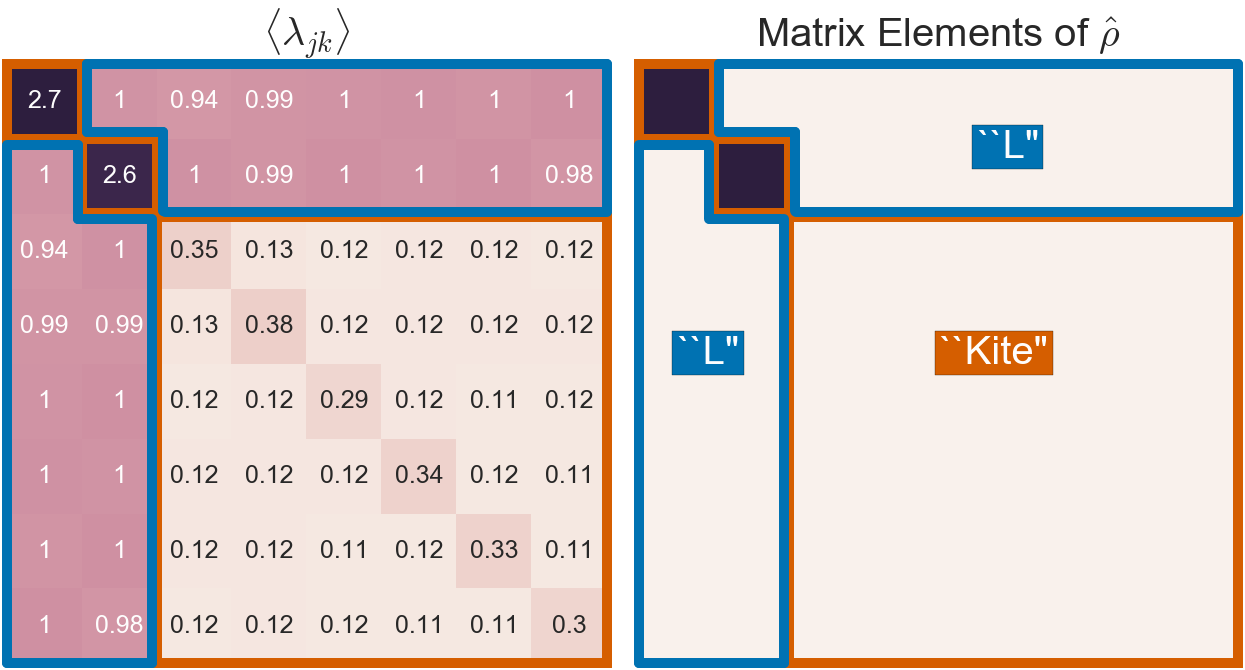

In [10]:
fig = plt.figure(figsize=(18, 10))

ax = plt.subplot2grid((1,2), (0,1), colspan=1)
try:
    sns.heatmap(N, ax=ax, annot=False, annot_kws={'fontsize': 35}, cbar=False)
except Exception:
    ax.pcolor(np.flipud(N), cmap=cm.Blues)

draw_kite(ax, label=True, fontsize=40)        
draw_L(fig, label=True, fontsize=40)

ax.set_title(r'Matrix Elements of $\hat{\rho}$', fontsize=40, y=1.02)

ax2 = plt.subplot2grid((1,2), (0,0), colspan=1)
try:
    sns.heatmap(M, ax=ax2, annot=True, annot_kws={'fontsize': 25}, vmin=0, cbar=False)
except Exception:
    ax2.pcolor(np.array(np.flipud(M)), cmap=cm.Blues)
draw_kite(ax2)
draw_L(fig)

ax2.set_title(r'$\langle \lambda_{jk}\rangle$', fontsize=40, y=1.02)
for a in [ax, ax2]:
    a.set_yticklabels([])
    a.set_xticklabels([])

fig.tight_layout()
plt.show()

Figure 3
============

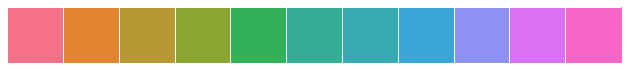

In [11]:
df = pd.read_csv('Data/iso_quantum_llrs_sim_totals.csv')
df1 = pd.read_csv('Data/iso_quantum_models.csv')
df = df.merge(df1, on=['dimRec', 'rankTrue'], how='inner')
df = df[df['dimRec'] <= 30]
ranks = df['rankTrue'].unique()

try:
    colors = sns.color_palette('husl', n_colors=len(ranks) + 1)
    sns.palplot(colors)
except Exception:
    colors = cm.viridis(np.linspace(0, 1, len(ranks) + 1))

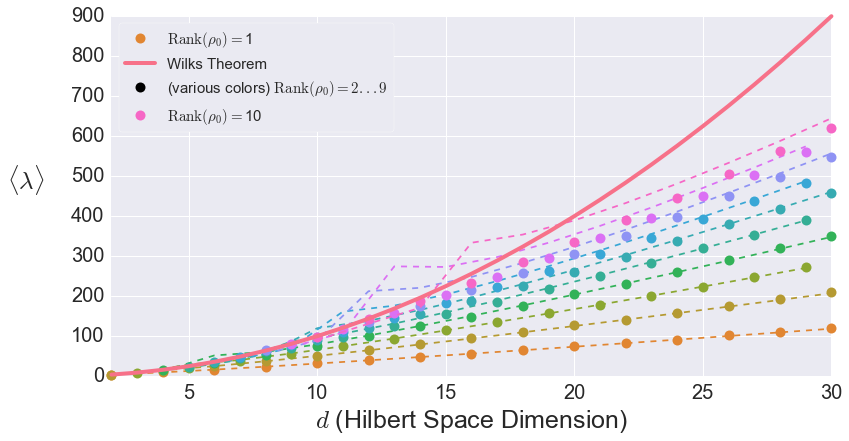

In [12]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
counter  = 1

for r in ranks:
    X = df[df['rankTrue'] == r]['dimRec'].values[::2]
    Y = df[df['rankTrue'] == r]['llrs'].values[::2]
    Z = df[df['rankTrue'] == r]['Our_Model'].values[::2]
    if r in [min(ranks), max(ranks)]:
        label = r'$\mathrm{Rank}(\rho_{0})=$'+ '{0}'.format(r)
    else:
        label = ''
    
    ax.plot(X, Y, clip_on=False, ls='', color=colors[counter],\
            marker='o', markersize=10, label=label , alpha=1)
    
    ax.plot(X, Z, clip_on=False, ls='--', color=colors[counter],\
            marker='', alpha=1)
    counter += 1
    
X = df[df['rankTrue'] == 1]['dimRec'].values
Y = df[df['rankTrue'] == 1]['Wilks_Theorem'].values

ax.plot(X, Y, ls='-', marker='', lw=4, clip_on=False,\
        color=colors[0], label='Wilks Theorem')

temp = ax.plot([], [], ls='', color='black', marker='o',
                          markersize=10, label=r'(various colors) $\mathrm{Rank}(\rho_{0}) = 2...9$')

handles, labels = ax.get_legend_handles_labels()
ix = [0, 2, 3, 1]
handles = list(np.array(handles)[ix])
labels = list(np.array(labels)[ix])

ax.legend(loc=0, fontsize=15, frameon=True, fancybox=True, handles=handles, labels=labels)

ax.set_xlabel(r'$d$ (Hilbert Space Dimension)', fontsize=25)
ax.set_ylabel(r'$\langle \lambda\rangle$', fontsize=25, rotation=0, labelpad=45)
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=20)
ax.set_xlim([2, 30])
plt.show()

Figure 4
============

In [13]:
df = pd.read_csv('Data/heterodyne_llrs_sim_results.csv')
temp = pd.DataFrame()

for stateID in df['stateID'].unique():
    S = max(df[df['stateID'] == stateID]['Sample'].unique())
    temp = temp.append(df[(df['stateID'] == stateID) & (df['Sample'] == S)], ignore_index=True)

temp['llrs'] = -2 *(temp['LogLik_true'] - temp['LogLik'])
temp = temp[temp['llrs'] <= 30]
temp = temp.drop(['stateID', 'Sample', 'numTrials', 'LogLik', 'LogLik_true'], axis=1)
df1 = pd.read_csv('Data/iso_quantum_models.csv')

df = temp.merge(df1, on=['dimRec', 'rankTrue'], how='inner') #.dropna()[['llrs', 'Wilks_Theorem', 'Our_Model']]


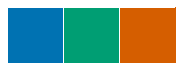

In [14]:
try:
    colors = sns.color_palette('colorblind', n_colors=3)
    sns.palplot(colors)
except Exception:
    colors = cm.PuOr(np.linspace(0, 1, 10))

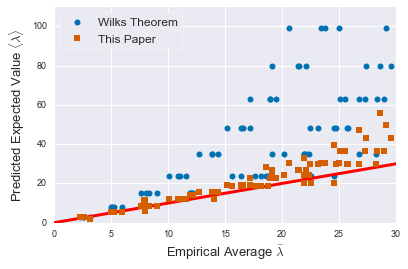

In [15]:
fig = plt.figure(figsize=(4.75, 3))
ax = fig.add_axes([0, 0, 1, 1])

x = df['llrs'].values
y = df['Wilks_Theorem'].values
    
ax.plot(x, y, ls='', marker='o', color=colors[0], clip_on=False, markersize=6, label='Wilks Theorem')


my = max(ax.get_ylim())
ax.set_ylim([0, my])

mx = max(ax.get_xlim())
ax.set_xlim([0, mx])
ax.plot([0, my], [0, my], ls='-', color='red', lw=3)

x = df['llrs'].values
y = df['Our_Model'].values
    
ax.plot(x, y, ls='', marker='s', color=colors[2], clip_on=False, markersize=6, label='This Paper')

my = max(ax.get_ylim())
ax.set_ylim([0, my])

mx = max(ax.get_xlim())
ax.set_xlim([0, mx])


ax.set_xlabel(r'Empirical Average $\bar{\lambda}$', fontsize=13)
ax.set_ylabel(r'Predicted Expected Value $\langle \lambda \rangle$', fontsize=13)
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=9)

ax.set_ylim([0, max(ax.get_ylim()) + 10])
ax.legend(loc=0, frameon=True, fontsize=12)
plt.show()

Figure 7
============

In [16]:
def matrix_rep(stateID, df):
    M = df[df['stateID'] == stateID].values[0][1:]
    M = [np.abs(np.complex(x)) for x in M]
    M = np.matrix(M).reshape((5, 5))
    N = np.zeros_like(np.eye(8))
    for j in xrange(len(M)):
        for k in xrange(len(M)):
            N[j, k] = M[j,k]
        
    return N

def llrs_contribs(stateID, df):
    M = np.matrix(df[df['stateID'] == stateID].values[0][2:], dtype=float)
    M = M.reshape((8, 8))
    
    return M

In [17]:
stateIDs = ['d2s0', 'd2s3', 'd4s4']

df = pd.read_csv('Data/states.csv')
M0list = map(lambda s: matrix_rep(s, df), stateIDs)

df1 = pd.read_csv('Data/iso_quantum_llrs_sim_contribs.csv')
df1 = df1[(df1['stateID'].isin(stateIDs)) & (df1['numTrials'] == 10 ** 3)]
contribsList = map(lambda s: llrs_contribs(s, df1), stateIDs)

In [18]:
N = int(df1['numTrials'].unique())

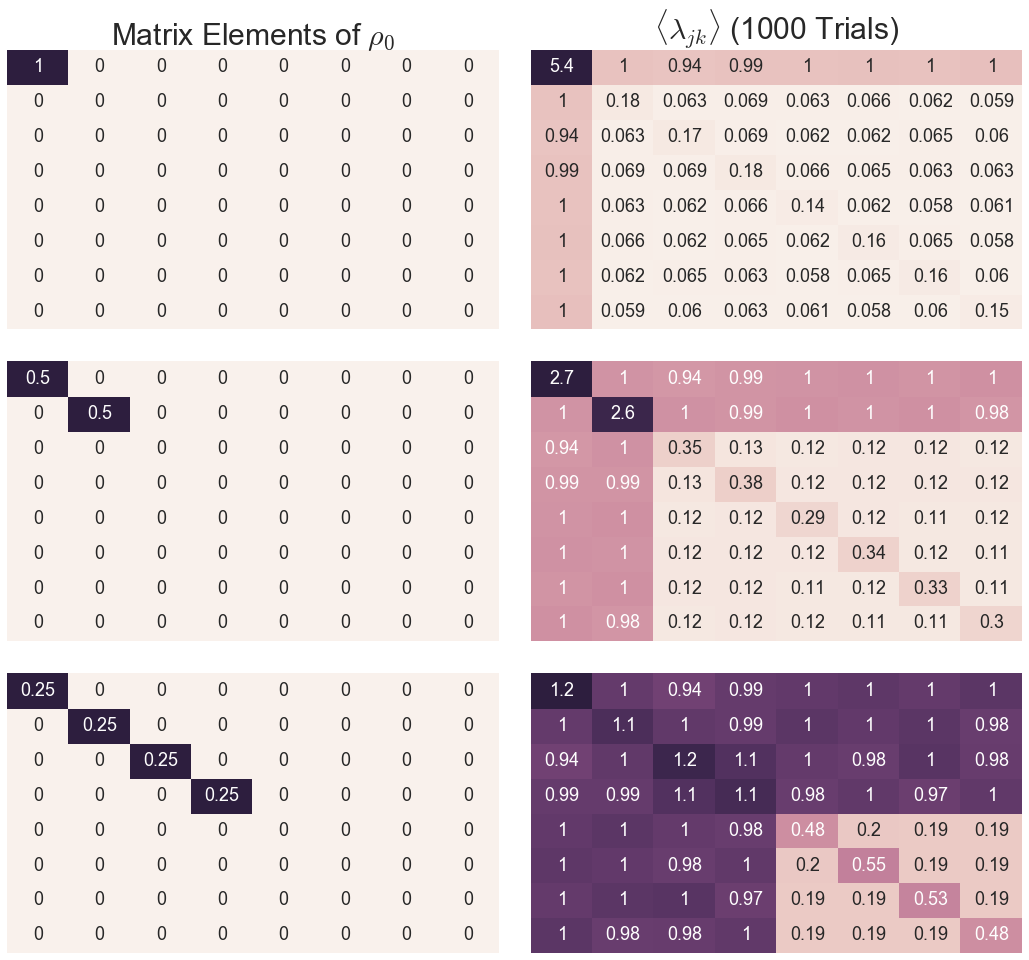

In [19]:
fig = plt.figure(figsize=(15, 14))

counter = 1
for j in xrange(len(M0list)):
    ax1 = fig.add_subplot(3, 2, counter)
    try:
        sns.heatmap(np.abs(M0list[j]), ax=ax1, annot=True, vmin=0, cbar=False, annot_kws={'fontsize': 18})
    except Exception:
        ax1.pcolor(np.flipud(np.abs(M0list[j])), cmap=cm.Blues)
    if j == 0 :ax1.set_title(r'Matrix Elements of $\rho_{0}$', fontsize=30)
    

    ax2 = fig.add_subplot(3, 2, counter + 1)
    try:
        sns.heatmap(contribsList[j], ax=ax2, annot=True, cbar=False, vmin=0, annot_kws={'fontsize': 18})
    except Exception:
        ax2.pcolor(np.flipud(np.array(contribsList[j])), cmap=cm.Blues)
    if j == 0:
        title = r'$\langle \lambda_{jk}\rangle$ '
        ax2.set_title(title + '({0} Trials)'.format(N),\
                             fontsize=30, y=1.02)
    counter +=2
    
    for a in [ax1, ax2]:
        #a.set_yticklabels(a.yaxis.get_majorticklabels(), rotation=0)
        a.set_xticklabels([])
        a.set_yticklabels([])
#fig.subplots_adjust(hspace=.2)
fig.tight_layout()
plt.show()

Figure 8
==========

In [20]:
df = pd.read_csv('Data/heterodyne_llrs_sim_results.csv')
temp = pd.DataFrame()

for stateID in df['stateID'].unique():
    S = max(df[df['stateID'] == stateID]['Sample'].unique())
    temp = temp.append(df[(df['stateID'] == stateID) & (df['Sample'] == S)], ignore_index=True)

temp['llrs'] = -2 *(temp['LogLik_true'] - temp['LogLik'])
temp = temp[temp['llrs'] <= 50]
temp = temp.drop(['stateID', 'Sample', 'numTrials', 'LogLik', 'LogLik_true'], axis=1)
df1 = pd.read_csv('Data/iso_quantum_models.csv')

df = temp.merge(df1, on=['dimRec', 'rankTrue'], how='inner') #.dropna()[['llrs', 'Wilks_Theorem', 'Our_Model']]


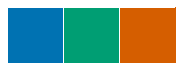

In [21]:
try:
    colors = sns.color_palette('colorblind', n_colors=3)
    sns.palplot(colors)
except Exception:
    colors = cm.PuOr(np.linspace(0, 1, 10))

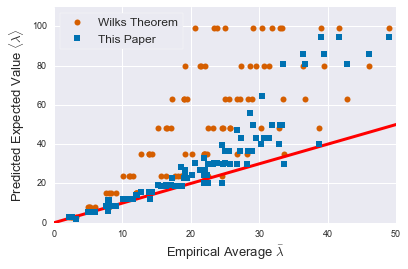

In [22]:
fig = plt.figure(figsize=(4.75, 3))
ax = fig.add_axes([0, 0, 1, 1])

x = df['llrs'].values
y = df['Wilks_Theorem'].values
    
ax.plot(x, y, ls='', marker='o', color=colors[2], clip_on=False, markersize=6, label='Wilks Theorem')


my = max(ax.get_ylim())
ax.set_ylim([0, my])

mx = max(ax.get_xlim())
ax.set_xlim([0, mx])
ax.plot([0, my], [0, my], ls='-', color='red', lw=3)

x = df['llrs'].values
y = df['Our_Model'].values
    
ax.plot(x, y, ls='', marker='s', color=colors[0], clip_on=False, markersize=6, label='This Paper')

my = max(ax.get_ylim())
ax.set_ylim([0, my])

mx = max(ax.get_xlim())
ax.set_xlim([0, mx])


ax.set_xlabel(r'Empirical Average $\bar{\lambda}$', fontsize=13)
ax.set_ylabel(r'Predicted Expected Value $\langle \lambda \rangle$', fontsize=13)
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=9)

ax.set_ylim([0, max(ax.get_ylim()) + 10])
ax.legend(loc=0, frameon=True, fontsize=12)

plt.show()

Figure 9
===========

In [23]:
dataD = pd.read_csv('Data/heterodyne_llrs_sim_results.csv')
dataD['llrs'] = -2 * (dataD['LogLik_true'] - dataD['LogLik'])
dataD = dataD.drop(['LogLik', 'LogLik_true', 'numTrials'], axis=1)
temp = pd.read_csv('Data/iso_quantum_models.csv')
temp = temp[['dimRec', 'rankTrue', 'Our_Model']]
dataD = dataD.merge(temp, on=['dimRec', 'rankTrue'])

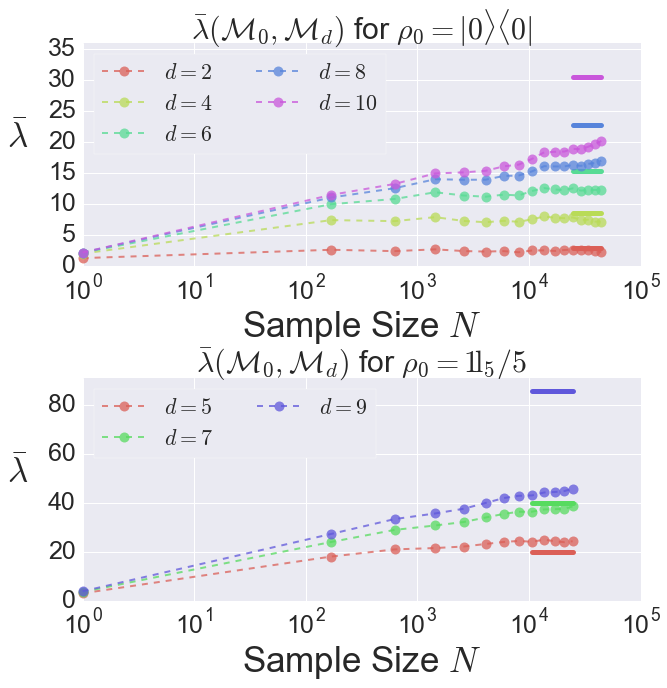

In [24]:
fig = plt.figure(figsize=(10, 10))
counter = 1
for stateID in ['d2s0', 'd5s0']:
    df = dataD[dataD['stateID'] == stateID]
    
    Samples = df['Sample'].unique()
    Samples = np.sort(Samples[::15])
    df = df[df['Sample'].isin(Samples)]
    dimRecs = np.sort(df['dimRec'].unique())
    dimRecs = dimRecs[::2]
    df = df[df['dimRec'].isin(dimRecs)]

    try:
        colors = sns.color_palette('hls', n_colors=len(dimRecs))
    except Exception:
        colors = cm.viridis(np.linspace(0, 1, len(dimRecs)))
    
    ax = fig.add_subplot(2, 1 ,counter)
    
    for dimRec in dimRecs:
        color= colors[np.where(dimRecs == dimRec)[0][0]]
        llrs = df[df['dimRec'] == dimRec]['llrs'].values
        ax.plot(Samples, llrs, ls='--', marker='o', clip_on=False, label=r'$d={0}$'.format(int(dimRec)),\
               color=color, markersize=10, alpha=.75, lw=2)
        our_value = float(df[df['dimRec'] == dimRec]['Our_Model'].unique())
        s = Samples[-5:]
        ax.plot(s, our_value * np.ones_like(s), ls='-', marker='', clip_on=False,\
               color=color, lw=5)

    ax.legend(loc=0, fontsize=22, ncol=2, frameon=True)
    ax.set_xscale('log')
    ax.set_ylim([0, max(ax.get_ylim()) + 1])
    ax.set_xlabel(r'Sample Size $N$', fontsize=35)
    ax.set_ylabel(r'$\bar{\lambda}$', fontsize=35, rotation=0, labelpad=30)
    ax.set_title(r'$\bar{2}$ for $\rho_{0} = {1}$'.format(0, idDict[stateID],\
                                                                      r'\lambda(\mathcal{M}_{0}, \mathcal{M}_{d})'),\
                 fontsize=30)

    for s in ['x', 'y']:
        ax.tick_params(axis=s, labelsize=25)
    counter += 1
    
fig.subplots_adjust(hspace=.5)
plt.show()

Figure 10
==============

In [25]:
df = pd.read_csv('Data/heterodyne_condition_num.csv')

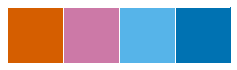

In [26]:

stateIDs = ['d2s0', 'd2s1', 'd2s2', 'd2s3']
try:
    colors = sns.color_palette('colorblind', n_colors=len(stateIDs) + 2)
    colors = [colors[2], colors[3], colors[5], colors[0]]
    sns.palplot(colors)
except Exception:
    colors = cm.viridis(np.linspace(0, 1, len(stateIDs) + 2))

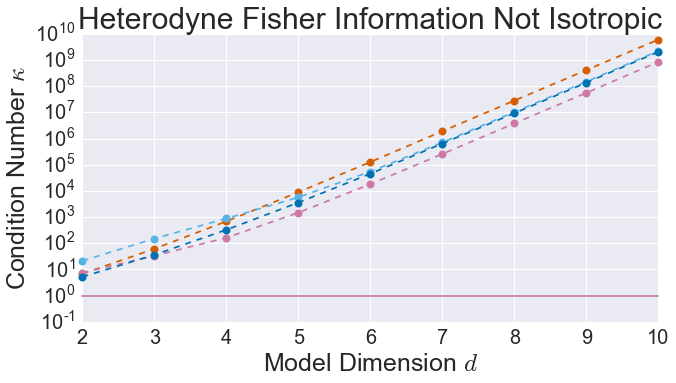

In [27]:

fig = plt.figure(figsize= (8, 4))
ax = fig.add_axes([0, 0, 1, 1])
dimRecs = range(2, 11)

counter = 0
for stateID in stateIDs:
    dimRecs = df[df['stateID'] == stateID]['dimRec'].values
    conditionNums = df[df['stateID'] == stateID]['conditionNum'].values

    ax.plot(dimRecs, conditionNums, ls='--', marker='o', markersize=8,\
            clip_on=False, color=colors[counter])
    
    counter +=1

ax.plot(dimRecs, np.ones_like(dimRecs), ls='-', marker='', color=colors[1], clip_on=False)
ax.set_yscale('log')
ax.set_xlabel(r'Model Dimension $d$', fontsize=25)
ax.set_ylabel(r'Condition Number $\kappa$', fontsize=25)
ax.set_title('Heterodyne Fisher Information Not Isotropic')
ax.set_ylim([.1, max(ax.get_ylim())])
for s in ['x', 'y']:
    ax.tick_params(axis=s, labelsize=20)
plt.show()

Figure 11
============

In [28]:
stateIDs = ['d2s0', 'd2s3']

df = pd.read_csv('Data/states.csv')
M0list = map(lambda s: matrix_rep(s, df), stateIDs)

df1 = pd.read_csv('Data/iso_quantum_llrs_sim_contribs.csv')
df1 = df1[df1['stateID'].isin(stateIDs)]
df1 = df1[df1['numTrials'] == 10 ** 4]

isoContribsList = map(lambda s: llrs_contribs(s, df1), stateIDs)

df2 = pd.read_csv('Data/heterodyne_llrs_sim_contribs.csv')
df2 = df2.drop(['sampleSize'], axis=1)
heteroContribsList = map(lambda s: llrs_contribs(s, df2), stateIDs)

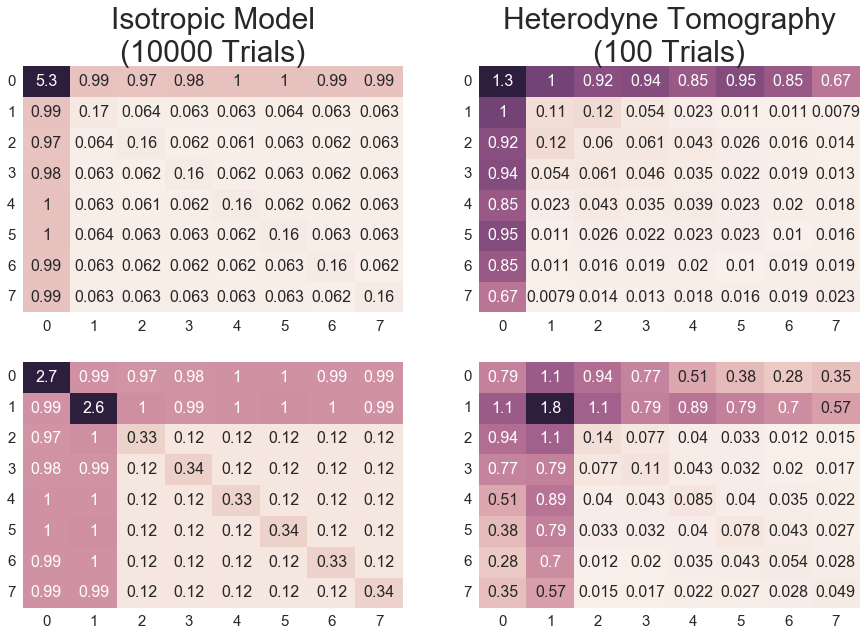

In [29]:
fig = plt.figure(figsize=(15, 15))

counter = 1
for j in xrange(len(isoContribsList)):
    ax1 = fig.add_subplot(3, 2, counter)

    try:
        sns.heatmap(isoContribsList[j], ax=ax1, annot=True, vmin=0, cbar=False, annot_kws={'fontsize': 16})
    except Exception:
        ax1.pcolor(np.flipud(np.array(isoContribsList[j])), cmap=cm.Blues)
    if j == 0:
        title = 'Isotropic Model\n({0} Trials)'.format(df1['numTrials'].unique()[0])
        ax1.set_title(title, fontsize=30)
    

    ax2 = fig.add_subplot(3, 2, counter + 1)
    try:
        sns.heatmap(heteroContribsList[j], ax=ax2, annot=True, cbar=False, vmin=0, annot_kws={'fontsize': 16})
    except Exception:
        ax2.pcolor(np.flipud(np.array(heteroContribsList[j])), cmap=cm.Blues)    
    
    if j == 0:
        title = 'Heterodyne Tomography\n({0} Trials)'.format(df2['numTrials'].unique()[0])

        ax2.set_title(title, fontsize=30)
    counter +=2
    
    for a in [ax1, ax2]:
        a.set_yticklabels(a.yaxis.get_majorticklabels(), rotation=0)
        for s in ['x', 'y']:
            a.tick_params(axis=s, labelsize=15)
plt.show()

Figure 13
============

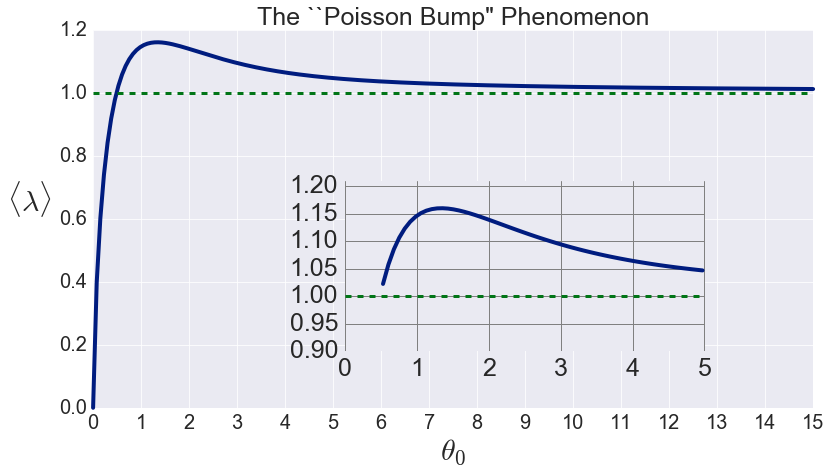

In [30]:
df = pd.read_csv('Data/poisson_llrs_data.csv')

try:
    sns.set(context='paper', palette='dark', style='darkgrid', font_scale=2.5,\
            rc={"grid.color": '1', 'lines.markeredgewidth': 0.1})
except Exception:
    pass

fig = plt.figure(figsize=(10, 5.25))
ax = fig.add_axes([0, 0, 1, 1])

x = df['rate_param'].values
y = df['llrs'].values
high = int(max(x))
ax.plot(x, y, clip_on=False, lw=4)
ax.plot(x, np.ones(len(x)), lw=3, ls='--')
ax.set_xticks(range(high + 1))
ax.set_xlim([0, high])
ax.set_xlabel(r'$\theta_{0}$', fontsize=30)
ax.set_ylabel(r'$\langle \lambda \rangle$', rotation=0, labelpad=30, fontsize=30)
ax.set_title('The ``Poisson Bump" Phenomenon', fontsize=25)

try:
    sns.set(font_scale=2.5, style='darkgrid', palette='dark',\
            rc={"grid.color": '.5', 'lines.markeredgewidth': 0.1})
except Exception:
    pass
x = df[(df['rate_param']<=5) & (df['rate_param'] >= .5)]['rate_param'].values
y = df[(df['rate_param']<=5) & (df['rate_param'] >= .5)]['llrs'].values
ax2 = fig.add_axes([.35, .15, .5, .45])
ax2.plot(x, y, clip_on=False, lw=4)
x = np.linspace(0, 5, 10)
ax2.plot(x, np.ones(len(x)), lw=3, ls='--')
ax2.set_xlim([0, 5.01])
ax2.set_ylim([.9, 1.21])
ax2.set_frame_on(True)
plt.show()